### recovery negative LDA

#### negative 
- 별점 1,2,3

In [4]:
import pandas as pd

In [5]:
df_recovery_negative = pd.read_csv('./recovery_negative.csv')

In [6]:
from gensim.corpora import Dictionary

In [7]:
type(df_recovery_negative['replaced_review'])

pandas.core.series.Series

In [8]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_recovery_negative['replaced_review'] = df_recovery_negative['replaced_review'].astype(str)

In [9]:
negative_review = df_recovery_negative['replaced_review'].apply(lambda x: x.split()).values

In [10]:
negative_review

array([list(['흘리다', '구매', '효능', '맞다', '모르다', '기력', '회복', '도움', '바라다', '후기', '올리다']),
       list(['사다', '지난', '유효', '기간', '짧다', '물건', '멘붕']),
       list(['좋다', '성분', '문인진', '모르다', '속이다', '메스껍다', '성분', '사다']), ...,
       list(['빨르다', '제품', '섭취', '한지', '좋다', '겠다']),
       list(['빨르다', '별로', '박스', '피로', '회복', '안되다', '드네']),
       list(['빨르다', '별로', '호불호', '모르다', '먹기', '포기'])], dtype=object)

In [11]:
dictionary = Dictionary(negative_review)
dictionary

In [12]:
dictionary.doc2bow(negative_review[3])

[(14, 1), (23, 1), (24, 1), (25, 1), (26, 1)]

In [13]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in negative_review :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [14]:
df_recovery_negative['문장벡터화'] = corpus_list

##### 토픽 잡기


In [15]:
from gensim.models import LdaModel

In [16]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=7)

In [17]:
lda_model.print_topics(num_words=7)

[(0,
  '0.017*"구매" + 0.014*"좋다" + 0.013*"제품" + 0.011*"아니다" + 0.011*"복용" + 0.010*"캡슐" + 0.009*"지아"'),
 (1,
  '0.028*"괜찮다" + 0.022*"가격" + 0.018*"복용" + 0.017*"비타민" + 0.011*"좋다" + 0.011*"그렇다" + 0.011*"구매"'),
 (2,
  '0.023*"좋다" + 0.021*"가격" + 0.015*"빨르다" + 0.015*"제품" + 0.010*"괜찮다" + 0.009*"아니다" + 0.008*"구매"'),
 (3,
  '0.024*"좋다" + 0.014*"모르다" + 0.013*"제품" + 0.011*"사다" + 0.011*"속이다" + 0.011*"복용" + 0.010*"가격"'),
 (4,
  '0.023*"제품" + 0.013*"아니다" + 0.012*"좋다" + 0.012*"복용" + 0.011*"구매" + 0.009*"모르다" + 0.009*"상품"'),
 (5,
  '0.029*"좋다" + 0.021*"복용" + 0.020*"제품" + 0.017*"모르다" + 0.016*"구매" + 0.010*"가격" + 0.009*"냄새"'),
 (6,
  '0.021*"구매" + 0.019*"좋다" + 0.019*"모르다" + 0.018*"가격" + 0.014*"아니다" + 0.014*"상품" + 0.013*"제품"')]

###### 최적 토픽 추출하기 

In [18]:
sentences = df_recovery_negative['replaced_review']
sentences

0                    흘리다 구매 효능 맞다 모르다 기력 회복 도움 바라다 후기 올리다
1                                    사다 지난 유효 기간 짧다 물건 멘붕
2                            좋다 성분 문인진 모르다 속이다 메스껍다 성분 사다
3                                        외국 출장 사다 코로나 인하다
4       상품 설명 제품 분명하다 적히다 사다 치다 버리다 야하다 제품 이구 쿠팡 대체 임박...
                              ...                        
1325                                      빨르다 가족 가격 부담스럽다
1326                                                   좋다
1327                                   빨르다 제품 섭취 한지 좋다 겠다
1328                               빨르다 별로 박스 피로 회복 안되다 드네
1329                                 빨르다 별로 호불호 모르다 먹기 포기
Name: replaced_review, Length: 1330, dtype: object

In [19]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [20]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['흘리다', '구매', '효능', '맞다', '모르다', '기력', '회복', '도움', '바라다', '후기', '올리다'],
 ['사다', '지난', '유효', '기간', '짧다', '물건', '멘붕'],
 ['좋다', '성분', '문인진', '모르다', '속이다', '메스껍다', '성분', '사다'],
 ['외국', '출장', '사다', '코로나', '인하다'],
 ['상품',
  '설명',
  '제품',
  '분명하다',
  '적히다',
  '사다',
  '치다',
  '버리다',
  '야하다',
  '제품',
  '이구',
  '쿠팡',
  '대체',
  '임박',
  '제품',
  '설명',
  '써다',
  '끄다',
  '그랬슴',
  '도안',
  '얼른',
  '환불',
  '해주다'],
 ['직구', '개월치', '구매', '너무하다', '아니다'],
 ['아니다', '구매', '팔면', '어떻다', '하나요', '구매', '기다', '제품', '확인', '판매', '좋다'],
 ['사다', '개월치', '어쩔'],
 ['구입', '어떻다'],
 ['주문',
  '날짜',
  '수령',
  '날짜',
  '로켓',
  '직구',
  '세계',
  '이슈',
  '코로나',
  '인하다',
  '공지',
  '늦어지다',
  '예상',
  '도착',
  '직업',
  '특성',
  '모니터',
  '장시간',
  '루테인',
  '필수',
  '국내',
  '제품',
  '남지',
  '제품',
  '구매',
  '해봤다',
  '비타민',
  '닥터',
  '베스트',
  '자주',
  '크다',
  '불안감',
  '없이',
  '구매',
  '금보',
  '알약',
  '크기',
  '기존',
  '제품',
  '작다',
  '삼키다',
  '넘기다',
  '편하다',
  '목구멍',
  '좁다',
  '알약',
  '크다',
  '식도',
  '넘어가다',
  '강하다',
  '제품',
  '알약',
  '작다',
  '먹기',
  

In [21]:
preprocessed_sentences = morphs_list

In [22]:
dictionary_sentences = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary_sentences

In [23]:
from gensim.models.coherencemodel import CoherenceModel

In [24]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    best_lda_model = LdaModel(corpus=corpus_list, id2word=dictionary_sentences, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=best_lda_model, texts=morphs_list, dictionary=dictionary_sentences)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(best_lda_model.log_perplexity(corpus_list))

In [25]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.375513,-7.130423
1,0.351422,-7.208825
2,0.397625,-7.260381
3,0.404653,-7.237937
4,0.377415,-7.323460
5,0.365748,-7.332175
6,0.397897,-7.321851
7,0.378447,-7.402904
8,0.390572,-7.492094


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

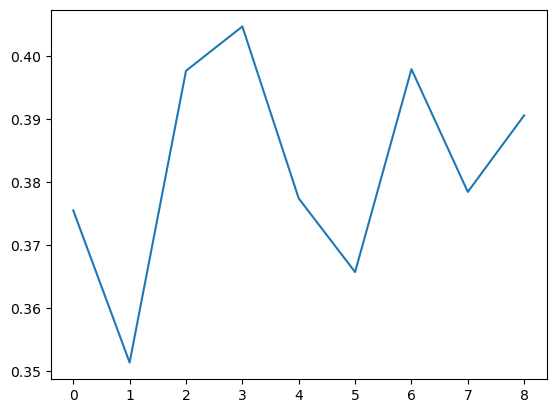

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

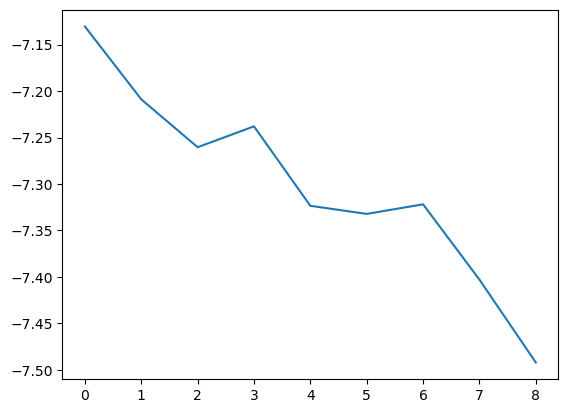

In [27]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [28]:
# %pip install --user pyLDAvis

In [29]:
# !pip install gensim

In [30]:
# !pip show pyLDAvis

In [31]:
import pyLDAvis.gensim_models

In [155]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [156]:
lda_model.print_topics(num_words=4)

[(0, '0.017*"복용" + 0.014*"좋다" + 0.013*"구매" + 0.011*"아니다"'),
 (1, '0.027*"좋다" + 0.023*"가격" + 0.016*"제품" + 0.014*"복용"'),
 (2, '0.022*"제품" + 0.015*"모르다" + 0.015*"구매" + 0.013*"좋다"')]

In [157]:
negative_topic=lda_model.print_topics(num_words=4)

In [158]:
type(negative_topic)

list

In [159]:
df_negative_topic=pd.DataFrame(data=negative_topic)

In [160]:
df_negative_topic.to_excel('./recovery_negative_topic.xlsx')

In [161]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [162]:
pyLDAvis.display(result_visualized)

In [163]:
# project_nutrients_review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, './recovery_review_negative_result_visualized.html')